In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
FOLDER = '../../data_handson/champs-scalar-coupling/'
os.listdir(FOLDER)

['scalar_coupling_contributions.csv',
 'mulliken_charges.csv',
 'structures.csv',
 'test.csv',
 'structures.zip',
 'train.csv',
 'magnetic_shielding_tensors.csv',
 'dipole_moments.csv',
 'sample_submission.csv',
 'potential_energy.csv']

## load all files as pandas dataframe

In [25]:
# df_mulliken_charges = pd.read_csv(FOLDER + 'mulliken_charges.csv')
# df_sample =  pd.read_csv(FOLDER + 'sample_submission.csv')
# df_magnetic_shielding_tensors = pd.read_csv(FOLDER + 'magnetic_shielding_tensors.csv')
df = pd.read_csv(FOLDER + 'train.csv')
# df_test = pd.read_csv(FOLDER + 'test.csv')
# df_dipole_moments = pd.read_csv(FOLDER + 'dipole_moments.csv')
# df_potential_energy = pd.read_csv(FOLDER + 'potential_energy.csv')
df_structures = pd.read_csv(FOLDER + 'structures.csv')
# df_scalar_coupling_contributions = pd.read_csv(FOLDER + 'scalar_coupling_contributions.csv')

In [26]:
df_structures_idx = df_structures.set_index('molecule_name')
df_idx = df.set_index('molecule_name')

In [10]:
df_structures_idx.loc['dsgdb9nsd_000001']

,atom_index,atom,x,y,z
molecule_name,,,,,
dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [27]:
df_idx.loc['dsgdb9nsd_000001'].query('type == "1JHC"')

,id,atom_index_0,atom_index_1,type,scalar_coupling_constant
molecule_name,,,,,
dsgdb9nsd_000001,0,1,0,1JHC,84.8076
dsgdb9nsd_000001,4,2,0,1JHC,84.8074
dsgdb9nsd_000001,7,3,0,1JHC,84.8093
dsgdb9nsd_000001,9,4,0,1JHC,84.8095


In [110]:
ATOMS = ['H', 'C', 'N', 'O', 'F']
mols = df['molecule_name'].unique()

In [7]:
def get_dist_matrix(df_structures_idx, molecule):
    df_temp = df_structures_idx.loc[molecule]
    locs = df_temp[['x','y','z']].values
    num_atoms = len(locs)
    loc_tile = np.tile(locs.T, (num_atoms,1,1))
    dist_mat = np.linalg.norm(loc_tile - loc_tile.T, axis=1)
    return dist_mat

In [78]:
def gen_3jpairs_list(df_idx, df_structures_idx, molecule_name, type_3J):
    pairs_list = []
    df_tr = df_idx.loc[molecule_name]
    df_st = df_structures_idx.loc[molecule_name]
    if type(df_tr) == pd.Series:
        return []
    
    pairs_3J = df_tr.query('type == "{}"'.format(type_3J))[['atom_index_0','atom_index_1','id']].values
    dist_matrix = get_dist_matrix(df_structures_idx, molecule_name)

    for p3 in pairs_3J:
        atom_idx_0 = p3[0]
        con_id = p3[2]

        dist_arr = dist_matrix[atom_idx_0]
        mask = dist_arr != 0
        dist_arr_excl_0 = dist_arr[mask]
        masked_idx = df_st['atom_index'].values[mask]
        atom_idx_1 = masked_idx[np.argsort(dist_arr_excl_0)[0]]

        atom_idx_3 = p3[1]
        dist_arr = dist_matrix[atom_idx_3]
        mask = dist_arr != 0
        dist_arr_excl_0 = dist_arr[mask]
        masked_idx = df_st['atom_index'].values[mask]
        atom_idx_2 = masked_idx[np.argsort(dist_arr_excl_0)[0]]        
        
        pair = [atom_idx_0, atom_idx_1, atom_idx_2, atom_idx_3, con_id]
        pairs_list.append(pair)
        
    return pairs_list

In [ ]:
def gen_3jpairs_list_r(df_idx, df_structures_idx, molecule_name, type_3J):
    pairs_list = []
    df_tr = df_idx.loc[molecule_name]
    df_st = df_structures_idx.loc[molecule_name]
    if type(df_tr) == pd.Series:
        return []
    
    pairs_3J = df_tr.query('type == "{}"'.format(type_3J))[['atom_index_0','atom_index_1','id']].values
    dist_matrix = get_dist_matrix(df_structures_idx, molecule_name)

    for p3 in pairs_3J:
        atom_idx_0 = p3[0]
        con_id = p3[2]

        dist_arr = dist_matrix[atom_idx_0]
        mask = dist_arr != 0
        dist_arr_excl_0 = dist_arr[mask]
        masked_idx = df_st['atom_index'].values[mask]
        atom_idx_1 = masked_idx[np.argsort(dist_arr_excl_0)[0]]

        atom_idx_3 = p3[1]
        dist_arr = dist_matrix[atom_idx_3]
        mask = dist_arr != 0
        dist_arr_excl_0 = dist_arr[mask]
        masked_idx = df_st['atom_index'].values[mask]
        atom_idx_2 = masked_idx[np.argsort(dist_arr_excl_0)[0]]        
        
        pair = [atom_idx_0, atom_idx_1, atom_idx_2, atom_idx_3, con_id]
        pairs_list.append(pair)
        
    return pairs_list

 # 1JHN, 1JHCの距離

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


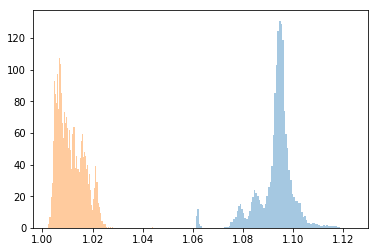

In [50]:
dist_arr_1JHC = np.zeros(0)
for m in mols[:5000]:
    dist_mat = get_dist_matrix(df_structures_idx, m)
    if type(df_idx.loc[m]) ==  pd.Series:
        continue
    idx  = df_idx.loc[m].query('type == "1JHC"')[['atom_index_0', 'atom_index_1']].values
    for i in idx:
        dist_arr_1JHC = np.hstack([dist_arr_1JHC, dist_mat[i[0], i[1]]])
        
dist_arr_1JHN = np.zeros(0)
for m in mols[:5000]:
    dist_mat = get_dist_matrix(df_structures_idx, m)
    if type(df_idx.loc[m]) ==  pd.Series:
        continue
    idx  = df_idx.loc[m].query('type == "1JHN"')[['atom_index_0', 'atom_index_1']].values
    for i in idx:
        dist_arr_1JHN = np.hstack([dist_arr_1JHN, dist_mat[i[0], i[1]]])
        

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


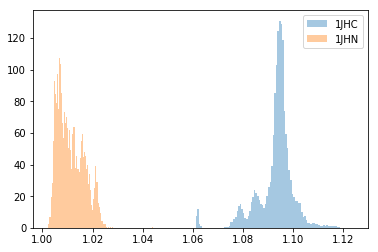

In [235]:
sns.distplot(dist_arr_1JHC, bins=100, kde=False, norm_hist=True, label='1JHC')
sns.distplot(dist_arr_1JHN, bins=100, kde=False, norm_hist=True, label='1JHN')
plt.legend()
plt.show()

# H-C-C-HのC-C距離

In [251]:
dist_arr_CC = np.zeros(0)

for m in mols[:10000]: # mols[11]
    dist_mat = get_dist_matrix(df_structures_idx, m)
    pairs_3j = gen_3jpairs_list(df_idx, df_structures_idx, m, '3JHH') # [atom_0, atom_x, atom_y, atom_1, con_id]
    if len(pairs_3j) == 0:
        continue
    center_pairs = np.array(pairs_3j)[:,1:3] #[atom_x, atom_y]
    unique_paires = np.unique(center_pairs, axis=0) # array([[0, 1], [1, 2]])
    center_atoms_idx = np.unique(unique_paires)  #[0 1 2]
    atoms = df_structures_idx.loc[m]['atom'].values # ['C' 'C' 'O' 'H' 'H' 'H' 'H' 'H' 'H']
    pickup_atoms = center_atoms_idx[atoms[center_atoms_idx] == "C"] # [0 1]

    for p in unique_paires:
        if np.isin(p, pickup_atoms).sum()/2 == 1:
            dist_arr_CC = np.hstack([dist_arr_CC, dist_mat[p[0], p[1]]])
            done_list.append(p)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


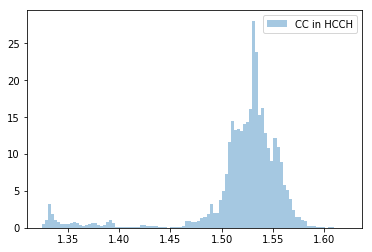

In [252]:
sns.distplot(dist_arr_CC, bins=100, kde=False, norm_hist=True, label='CC in HCCH')
plt.legend()
plt.show()

In [253]:
dist_arr_CN = np.zeros(0)

for m in mols[:10000]: 
    dist_mat = get_dist_matrix(df_structures_idx, m)
    pairs_3j = gen_3jpairs_list(df_idx, df_structures_idx, m, '3JHH') 
    if len(pairs_3j) == 0:
        continue
    center_pairs = np.array(pairs_3j)[:,1:3] 
    unique_paires = np.unique(center_pairs, axis=0)
    center_atoms_idx = np.unique(unique_paires)
    atoms = df_structures_idx.loc[m]['atom'].values 
    pickup_atoms = center_atoms_idx[atoms[center_atoms_idx] == "N"] 

    for p in unique_paires:
        if np.isin(p, pickup_atoms).sum() == 1:
            dist_arr_CN = np.hstack([dist_arr_CN, dist_mat[p[0], p[1]]])
            done_list.append(p)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


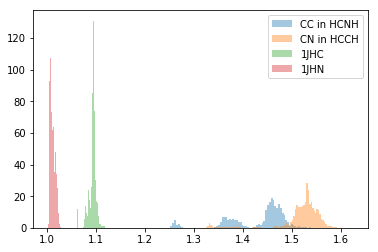

In [254]:
sns.distplot(dist_arr_CN, bins=100, kde=False, norm_hist=True, label='CC in HCNH')
sns.distplot(dist_arr_CC, bins=100, kde=False, norm_hist=True, label='CN in HCCH')
sns.distplot(dist_arr_1JHC, bins=100, kde=False, norm_hist=True, label='1JHC')
sns.distplot(dist_arr_1JHN, bins=100, kde=False, norm_hist=True, label='1JHN')
plt.legend()
plt.show()

#  H-Oは１Å未満
max ~ 0.9820

In [272]:
dist_arr_HO = np.zeros(0)

for m in mols[:10000]:
    atom_O_mask = df_structures_idx.loc[m]['atom'] == 'O'
    atom_O_idx = df_structures_idx.loc[m]['atom_index'].values[atom_O_mask]
    atom_H_mask = df_structures_idx.loc[m]['atom'] == 'H'
    atom_H_idx = df_structures_idx.loc[m]['atom_index'].values[atom_H_mask]
    dist_mat = get_dist_matrix(df_structures_idx, m)

    if len(atom_O_idx) > 0:
        for idx_o in atom_O_idx:
            for idx_h in atom_H_idx:
                dist = dist_mat[idx_o, idx_h]
                if dist < 1.5:
                    dist_arr_HO = np.hstack([dist_arr_HO, dist])

In [284]:
dist_arr_HO.max()

0.9820322416368512

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


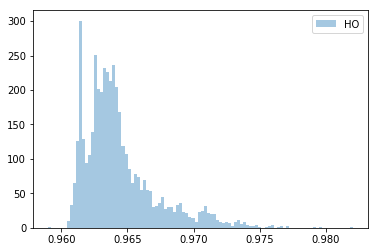

In [273]:
sns.distplot(dist_arr_HO, bins=100, kde=False, norm_hist=True, label='HO')
plt.legend()
plt.show()

In [274]:
dist_arr_CO = np.zeros(0)

for m in mols[:10000]:
    atom_O_mask = df_structures_idx.loc[m]['atom'] == 'O'
    atom_O_idx = df_structures_idx.loc[m]['atom_index'].values[atom_O_mask]
    atom_C_mask = df_structures_idx.loc[m]['atom'] == 'C'
    atom_C_idx = df_structures_idx.loc[m]['atom_index'].values[atom_C_mask]
    dist_mat = get_dist_matrix(df_structures_idx, m)

    if len(atom_O_idx) > 0:
        for idx_o in atom_O_idx:
            for idx_c in atom_C_idx:
                dist = dist_mat[idx_o, idx_c]
                if dist < 2:
                    dist_arr_CO = np.hstack([dist_arr_CO, dist])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


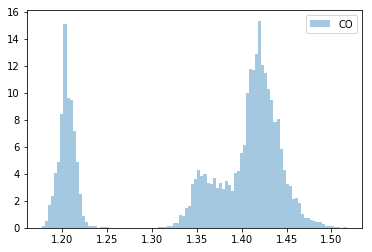

In [275]:
sns.distplot(dist_arr_CO, bins=100, kde=False, norm_hist=True, label='CO')
plt.legend()
plt.show()

In [278]:
dist_arr_CF = np.zeros(0)

for m in mols[:20000]:
    atom_F_mask = df_structures_idx.loc[m]['atom'] == 'F'
    atom_F_idx = df_structures_idx.loc[m]['atom_index'].values[atom_F_mask]
    atom_C_mask = df_structures_idx.loc[m]['atom'] == 'C'
    atom_C_idx = df_structures_idx.loc[m]['atom_index'].values[atom_C_mask]
    dist_mat = get_dist_matrix(df_structures_idx, m)

    if len(atom_F_idx) > 0:
        for idx_f in atom_F_idx:
            for idx_c in atom_C_idx:
                dist = dist_mat[idx_f, idx_c]
                if dist < 2:
                    dist_arr_CF = np.hstack([dist_arr_CF, dist])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


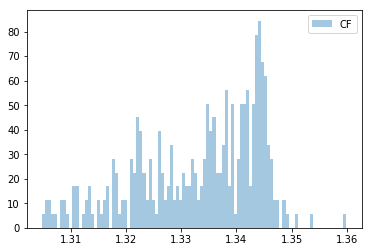

In [279]:
sns.distplot(dist_arr_CF, bins=100, kde=False, norm_hist=True, label='CF')
plt.legend()
plt.show()

In [359]:
dist_arr_CN = np.zeros(0)

for m in mols[:10000]:
    atom_N_mask = df_structures_idx.loc[m]['atom'] == 'N'
    atom_N_idx = df_structures_idx.loc[m]['atom_index'].values[atom_N_mask]
    atom_C_mask = df_structures_idx.loc[m]['atom'] == 'C'
    atom_C_idx = df_structures_idx.loc[m]['atom_index'].values[atom_C_mask]
    dist_mat = get_dist_matrix(df_structures_idx, m)

    if len(atom_N_idx) > 0:
        for idx_n in atom_N_idx:
            for idx_c in atom_C_idx:
                dist = dist_mat[idx_n, idx_c]
                if dist < 1.65:
                    dist_arr_CN = np.hstack([dist_arr_CN, dist])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


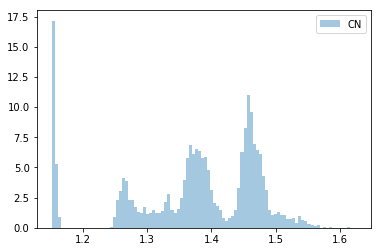

In [360]:
sns.distplot(dist_arr_CN, bins=100, kde=False, norm_hist=True, label='CN')
plt.legend()
plt.show()

In [362]:
pairs_3j = gen_3jpairs_list(df_idx, df_structures_idx, m, '3JHC') 
pairs_3j 

[[8, 0, 11, 2, 477258],
 [9, 0, 11, 2, 477262],
 [10, 0, 11, 2, 477265],
 [11, 2, 8, 0, 477266],
 [11, 2, 14, 5, 477269],
 [12, 3, 14, 5, 477275],
 [12, 3, 7, 6, 477276],
 [13, 3, 14, 5, 477280],
 [13, 3, 7, 6, 477281],
 [14, 5, 11, 2, 477282],
 [14, 5, 12, 3, 477283],
 [15, 5, 11, 2, 477287],
 [15, 5, 12, 3, 477288]]

In [363]:
df_structures_idx.loc[ m]

,atom_index,atom,x,y,z
molecule_name,,,,,
dsgdb9nsd_015696,0,C,-0.060062,1.444174,0.069427
dsgdb9nsd_015696,1,O,-0.023836,0.047136,-0.183335
dsgdb9nsd_015696,2,C,-1.252202,-0.603088,-0.015204
dsgdb9nsd_015696,3,C,-1.219785,-2.012735,-0.614319
dsgdb9nsd_015696,4,O,-2.189918,-2.753974,0.123268
dsgdb9nsd_015696,5,C,-2.097433,-2.358430,1.480240
dsgdb9nsd_015696,6,C,-1.605317,-0.912391,1.457547
dsgdb9nsd_015696,7,O,-1.469846,-0.179005,2.400994
dsgdb9nsd_015696,8,H,0.940027,1.825635,-0.147686


In [280]:
dist_arr_CCC = np.zeros(0)

for m in mols[:10000]: 
    dist_mat = get_dist_matrix(df_structures_idx, m)
    pairs_3j = gen_3jpairs_list(df_idx, df_structures_idx, m, '3JHC') 
    if len(pairs_3j) == 0:
        continue
    center_pairs = np.array(pairs_3j)[:,1:3] 
    unique_paires = np.unique(center_pairs, axis=0)
    center_atoms_idx = np.unique(unique_paires)
    atoms = df_structures_idx.loc[m]['atom'].values 
    pickup_atoms = center_atoms_idx[atoms[center_atoms_idx] == "C"] 

    for p in unique_paires:
        if np.isin(p, pickup_atoms).sum() / 2 == 1:
            dist_arr_CCC = np.hstack([dist_arr_CCC, dist_mat[p[0], p[1]]])
            done_list.append(p)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


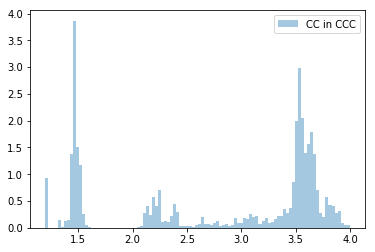

In [281]:
sns.distplot(dist_arr_CCC, bins=100, kde=False, norm_hist=True, label='CC in CCC')
plt.legend()
plt.show()

In [282]:
dist_arr_CCN = np.zeros(0)

for m in mols[:10000]: 
    dist_mat = get_dist_matrix(df_structures_idx, m)
    pairs_3j = gen_3jpairs_list(df_idx, df_structures_idx, m, '3JHN') 
    if len(pairs_3j) == 0:
        continue
    center_pairs = np.array(pairs_3j)[:,1:3] 
    unique_paires = np.unique(center_pairs, axis=0)
    center_atoms_idx = np.unique(unique_paires)
    atoms = df_structures_idx.loc[m]['atom'].values 
    pickup_atoms = center_atoms_idx[atoms[center_atoms_idx] == "C"] 

    for p in unique_paires:
        if np.isin(p, pickup_atoms).sum() / 2 == 1:
            dist_arr_CCN = np.hstack([dist_arr_CCN, dist_mat[p[0], p[1]]])
            done_list.append(p)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


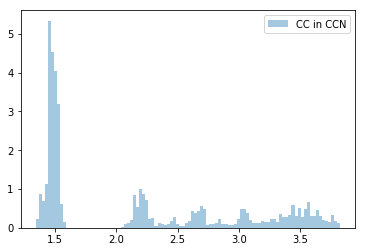

In [283]:
sns.distplot(dist_arr_CCN, bins=100, kde=False, norm_hist=True, label='CC in CCN')
plt.legend()
plt.show()

In [449]:
gen_3JHN_list(df_idx, df_structures_idx, mols[726])

[[9, 3, array([1]), 0, 25129], [10, 3, array([1]), 0, 25137]]

In [450]:
df_idx.loc[mols[726]].query('type == "3JHN"')

,id,atom_index_0,atom_index_1,type,scalar_coupling_constant
molecule_name,,,,,
dsgdb9nsd_001226,25129,9,0,3JHN,-0.145674
dsgdb9nsd_001226,25137,10,0,3JHN,0.237174


In [448]:
def gen_3JHN_list(df_idx, df_structures_idx, molecule_name):
    pairs_list = []
    df_tr = df_idx.loc[molecule_name]
    df_st = df_structures_idx.loc[molecule_name]

    if type(df_tr) == pd.Series:
        return []

    pairs_3J = df_tr.query('type == "{}"'.format('3JHN'))[['atom_index_0','atom_index_1','id']].values
    dist_matrix = get_dist_matrix(df_structures_idx, molecule_name)

    for p3 in pairs_3J:
        atom_idx_0 = p3[0] 
        con_id = p3[2] 

        dist_arr = dist_matrix[atom_idx_0] 
        mask = dist_arr != 0
        dist_arr_excl_0 = dist_arr[mask]
        masked_idx = df_st['atom_index'].values[mask]
        print()
        atom_idx_1 = masked_idx[np.argsort(dist_arr_excl_0)[0]]

        atom_idx_3 = p3[1]
        dist_arr = dist_matrix[atom_idx_3]
        atom_idx_2 = np.arange(len(dist_arr))[(dist_arr > 1.1) * (dist_arr < 1.65)]

        pair = [atom_idx_0, atom_idx_1, atom_idx_2, atom_idx_3, con_id]
        pairs_list.append(pair)

    return pairs_list

In [426]:
dist_arr_CCN = np.zeros(0)

for m in mols[:10000]: 
    dist_mat = get_dist_matrix(df_structures_idx, m)
    pairs_3j = gen_3JHN_list(df_idx, df_structures_idx, m) 
    if len(pairs_3j) == 0:
        continue
    center_pairs = np.array(pairs_3j)[:,1:3] 
    unique_paires = np.unique(center_pairs, axis=0)
    center_atoms_idx = np.unique(unique_paires)
    atoms = df_structures_idx.loc[m]['atom'].values 
    pickup_atoms = center_atoms_idx[atoms[center_atoms_idx] == "C"] 

    for p in unique_paires:
        if np.isin(p, pickup_atoms).sum() / 2 == 1:
            dist_arr_CCN = np.hstack([dist_arr_CCN, dist_mat[p[0], p[1]]])
            done_list.append(p)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


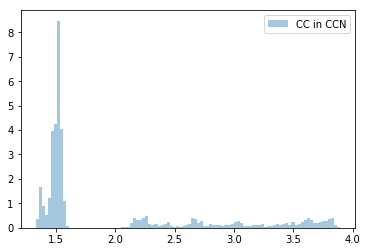

In [427]:
sns.distplot(dist_arr_CCN, bins=100, kde=False, norm_hist=True, label='CC in CCN')
plt.legend()
plt.show()

In [393]:
df_structures_idx.loc[mols[726]]

,atom_index,atom,x,y,z
molecule_name,,,,,
dsgdb9nsd_001226,0,N,-0.002783,1.333535,-0.105165
dsgdb9nsd_001226,1,C,0.037218,0.005121,0.193069
dsgdb9nsd_001226,2,O,1.039985,-0.545392,0.603198
dsgdb9nsd_001226,3,C,-1.289704,-0.736839,0.005649
dsgdb9nsd_001226,4,C,-1.061964,-2.218071,-0.317705
dsgdb9nsd_001226,5,C,-2.283752,-3.056935,-0.036199
dsgdb9nsd_001226,6,O,-2.794744,-3.825456,-0.808512
dsgdb9nsd_001226,7,H,0.829637,1.882072,0.035786
dsgdb9nsd_001226,8,H,-0.828296,1.784777,-0.456688


In [394]:
df_idx.loc[mols[726]]

,id,atom_index_0,atom_index_1,type,scalar_coupling_constant
molecule_name,,,,,
dsgdb9nsd_001226,25122,7,0,1JHN,57.697300
dsgdb9nsd_001226,25123,7,1,2JHC,-3.165230
dsgdb9nsd_001226,25124,7,3,3JHC,6.352630
dsgdb9nsd_001226,25125,7,8,2JHH,5.338260
dsgdb9nsd_001226,25126,8,0,1JHN,56.718900
dsgdb9nsd_001226,25127,8,1,2JHC,5.627870
dsgdb9nsd_001226,25128,8,3,3JHC,0.883449
dsgdb9nsd_001226,25129,9,0,3JHN,-0.145674
dsgdb9nsd_001226,25130,9,1,2JHC,-4.957040
